In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST Data

In [2]:
(X_train, y_train),(X_test,y_test) =  mnist.load_data()
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


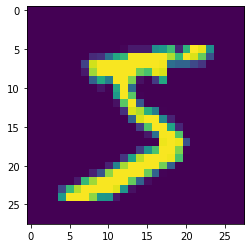

In [3]:
plt.imshow(X_train[0])

# Reshaping the Dataset

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# Type Conversion and Normalization

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# One Hot Encoding

In [6]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Objective is to create a model with less than 10k parameters and achieve an accuracy of more than 99.4 percentage on the validation set

## Model Architecture

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10,kernel_size=(3, 3), activation = 'relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(10,kernel_size=(1, 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(10,kernel_size=(4, 4)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 10)       40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 16)        0

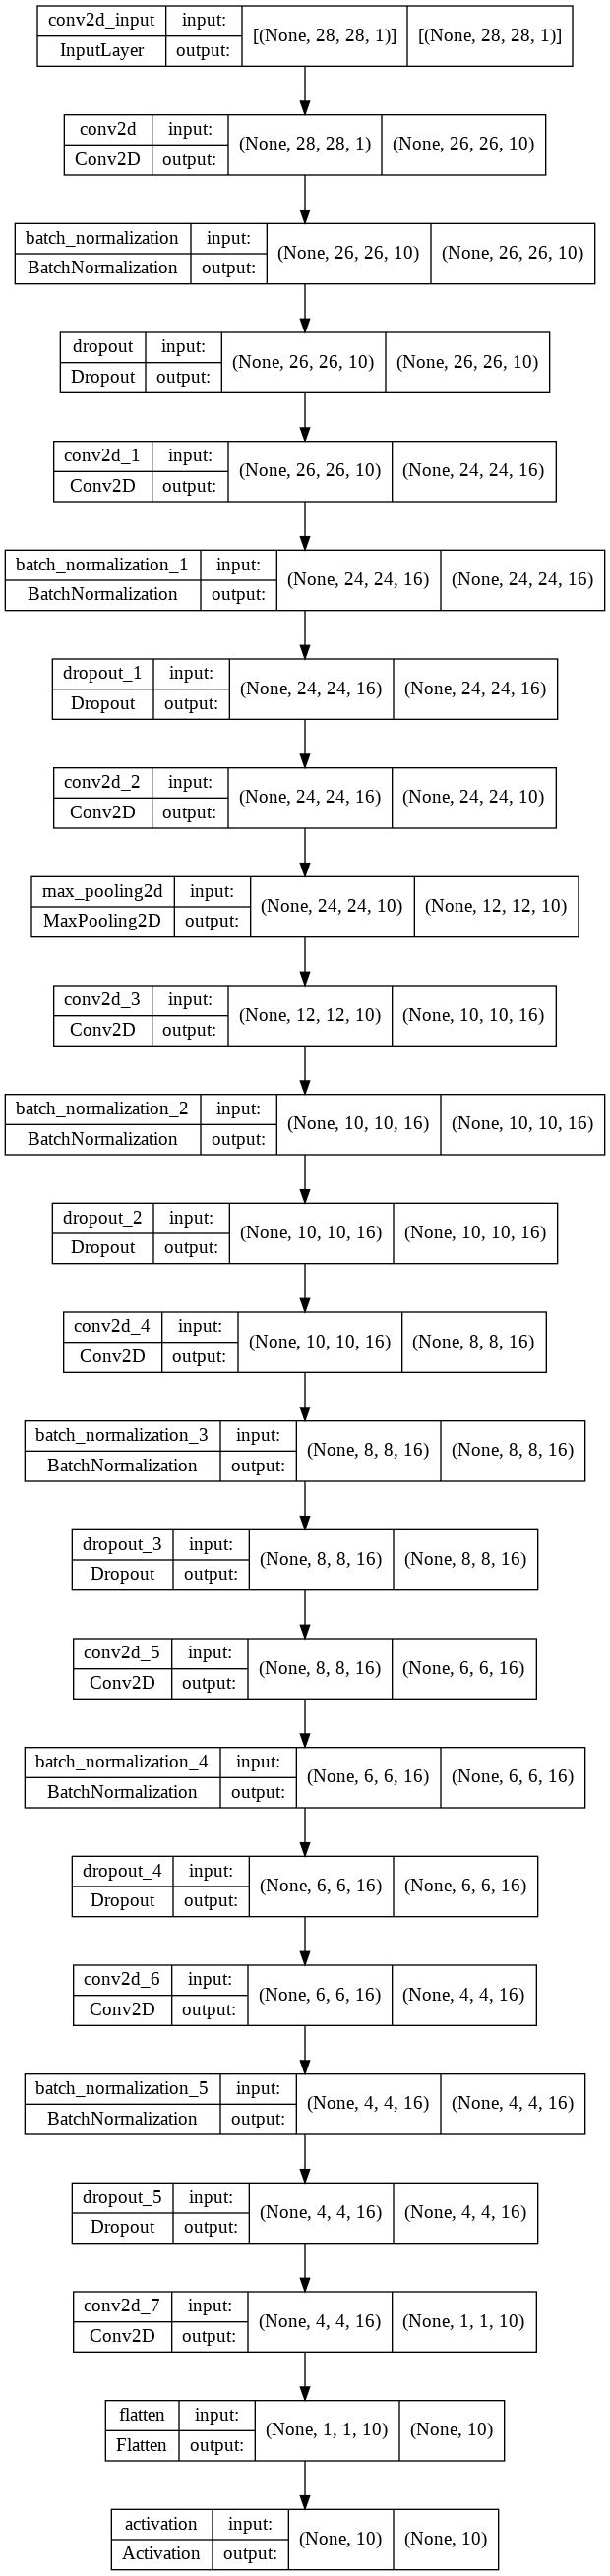

In [9]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [10]:
def scheduler(epoch,lr):
  return round(0.003 * 1 / (1+0.319 * epoch),10)

def exponential_decay(lr,s):
  def exponential_decay_fn(epoch):
    return lr * 0.1 **(epoch /s)
  return exponential_decay_fn

model.compile(loss = tf.keras.metrics.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.003),metrics = ['accuracy'])
model.fit(X_train,y_train, batch_size = 128,epochs = 20,verbose =1 , validation_data =(X_test,y_test),callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 85s 179ms/step - loss: 0.2139 - accuracy: 0.9326 - val_loss: 0.1121 - val_accuracy: 0.9635 - lr: 0.0030
Epoch 2/20
469/469 [==============================] - 88s 188ms/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0478 - val_accuracy: 0.9848 - lr: 0.0023
Epoch 3/20
469/469 [==============================] - 85s 181ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0331 - val_accuracy: 0.9887 - lr: 0.0018
Epoch 4/20
469/469 [==============================] - 87s 186ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9892 - lr: 0.0015
Epoch 5/20
469/469 [==============================] - 85s 182ms/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 0.0336 - val_accuracy: 0.9896 - lr: 0.0013
Epoch 6/20
469/469 [==============================] - 86s 183ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0292 - val_accuracy: 0.9907 - lr: 0.0012
Epoch 7/20
469/469 [==============================] 

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10,kernel_size=(3, 3), activation = 'relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(10,kernel_size=(1, 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(10,kernel_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Activation('softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 10)       40        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 26, 26, 10)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 16)       

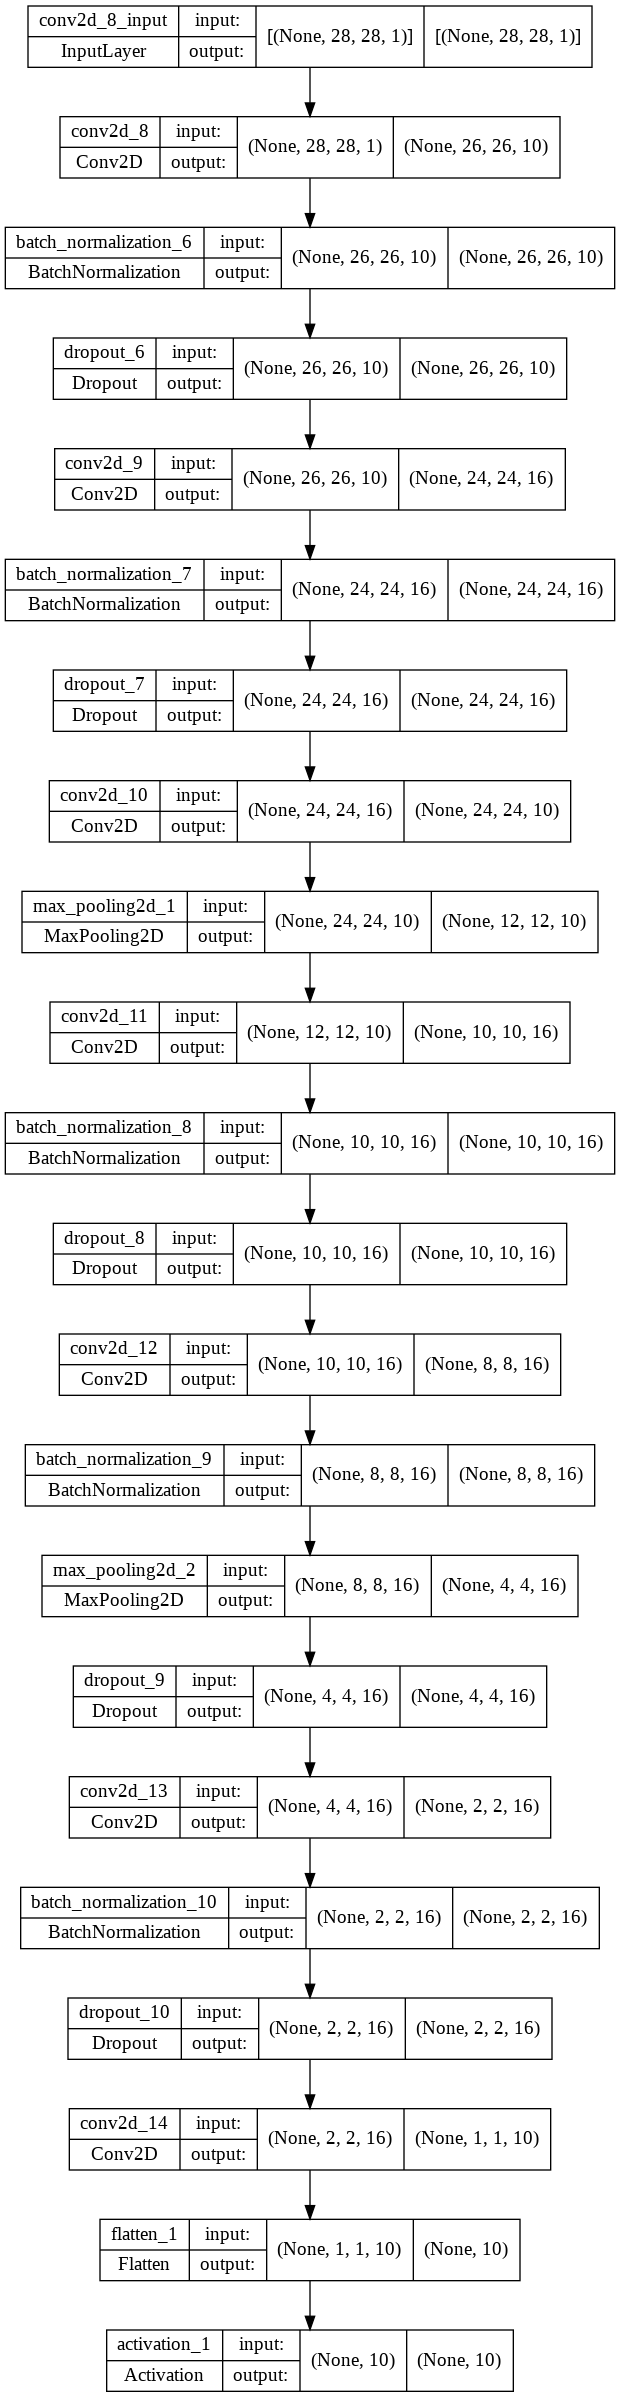

In [16]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [14]:
model.compile(loss = tf.keras.metrics.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.003),metrics = ['accuracy'])
model.fit(X_train,y_train, batch_size = 128,epochs = 30,verbose =1 , validation_data =(X_test,y_test),callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 91s 191ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0263 - val_accuracy: 0.9916 - lr: 0.0030
Epoch 2/30
469/469 [==============================] - 89s 190ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0281 - val_accuracy: 0.9899 - lr: 0.0023
Epoch 3/30
469/469 [==============================] - 90s 192ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0231 - val_accuracy: 0.9921 - lr: 0.0018
Epoch 4/30
469/469 [==============================] - 90s 193ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0220 - val_accuracy: 0.9927 - lr: 0.0015
Epoch 5/30
469/469 [==============================] - 89s 190ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0231 - val_accuracy: 0.9923 - lr: 0.0013
Epoch 6/30
469/469 [==============================] - 89s 190ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0177 - val_accuracy: 0.9943 - lr: 0.0012
Epoch 7/30
469/469 [==============================] - 91s 194ms

In [15]:
score = model.evaluate(X_test,y_test,verbose=0)
score

[0.016256289556622505, 0.9950000047683716]